In [0]:
# Import dependencies from scikit-learn for model predictions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Import pandas for data handling
import pandas as pd

# Gather data from the CSV file
df = pd.read_csv("creditcard.csv")

# Get a description of the data
print(df.describe())

# Print end of data
print(df.tail())



                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]
            Time         V1         V2  ...       V28  Amount  Class
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
28

In [0]:

# Use 'Amount' and 'V1' , ..., 'V28' as features
X = df[["Amount"]+[f"V{num}" for num in range(1,29)]]

# Use 'Class' as the variable we want to predict; Fraud or non-fraud
y = df["Class"]

# Print end of data
print(X.tail())
print(y.tail())

        Amount         V1         V2  ...       V26       V27       V28
284802    0.77 -11.881118  10.071785  ...  0.250034  0.943651  0.823731
284803   24.79  -0.732789  -0.055080  ... -0.395255  0.068472 -0.053527
284804   67.88   1.919565  -0.301254  ... -0.087371  0.004455 -0.026561
284805   10.00  -0.240440   0.530483  ...  0.546668  0.108821  0.104533
284806  217.00  -0.533413  -0.189733  ... -0.818267 -0.002415  0.013649

[5 rows x 29 columns]
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64


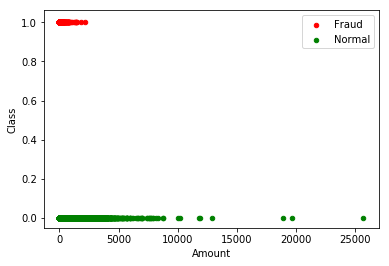

In [0]:
# Visualizing the dataset

import matplotlib.pyplot as plt
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]

ax = frauds.plot.scatter(x='Amount',y='Class', color='Red', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Green', label='Normal', ax=ax)
plt.show()

In [0]:
 """
 Function for making the distribution of the values of each variable similar
 by subtracting the mean and dividing by the standard deviation.
 """
def normalize(X):
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

In [0]:
# Generate model
model = LogisticRegression()

# Split data between training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.035)
    
# Normalize the data independent from eachother
X_train = normalize(X_train)
X_test = normalize(X_test)
    
# Fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
# Show the results
print(classification_report(y_test, y_pred))
print(f"Score: {model.score(X_test,y_test)}")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9956
           1       0.80      0.62      0.70        13

    accuracy                           1.00      9969
   macro avg       0.90      0.81      0.85      9969
weighted avg       1.00      1.00      1.00      9969

Score: 0.9992978232520815
